Let's describe the process of multiprocessing in my situation

The idea is the following: fit the trees in parallel:

Now:
Forest:
1. Sample data for tree
2. Fit tree
3. Repeat

In this way, the trees fitted in serial (tree by tree)

And I want to fit them in parallel way
It seems, it's quite easy to implement

Let's check the optimal number of processes

In [1]:
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import csv
import operator
import Geohash
import random
from ForestBuilding import ForestBuilding
from build import TreeBuilding
from sklearn.cross_validation import train_test_split
import pickle
    
%matplotlib inline

In [2]:
air_trajs = pd.read_csv('1_500_data.csv',
                        #index_col=,
                        usecols = ['POLYLINE', 'Destination'],
                        converters={'POLYLINE': lambda x: json.loads(x), 'Destination': lambda x: json.loads(x)})

trajectories = list(air_trajs['POLYLINE'])
targets = list(air_trajs['Destination'])

X_train, X_test, y_train, y_test = train_test_split(trajectories, targets, train_size=0.10, random_state = 0)




In [15]:
import time

benchmarks = []
n= 10
forest_clf = ForestBuilding()

start = time.time()
f = forest_clf.fit(X_train, y_train, n, 1, 10)
end = time.time()
benchmarks.append(end - start)

for i in range(2,7):
    start = time.time()
    f = forest_clf.fit(X_train, y_train, n, 1, 10, processes=i)
    end = time.time()
    benchmarks.append(end - start)

In [21]:
range(2,7)

[2, 3, 4, 5, 6]

In [16]:
import platform

def print_sysinfo():

    print('\nPython version  :', platform.python_version())
    print('compiler        :', platform.python_compiler())

    print('\nsystem     :', platform.system())
    print('release    :', platform.release())
    print('machine    :', platform.machine())
    print('processor  :', platform.processor())
    print('CPU count  :', mp.cpu_count())
    print('interpreter:', platform.architecture()[0])
    print('\n\n')

In [22]:
from matplotlib import pyplot as plt
import numpy as np
import multiprocessing as mp

def plot_results():
    bar_labels = ['serial', '2', '3', '4', '5', '6']

    fig = plt.figure(figsize=(10,8))

    # plot bars
    y_pos = np.arange(len(benchmarks))
    plt.yticks(y_pos, bar_labels, fontsize=16)
    bars = plt.barh(y_pos, benchmarks,
             align='center', alpha=0.4, color='g')

    # annotation and labels

    for ba,be in zip(bars, benchmarks):
        plt.text(ba.get_width() + 2, ba.get_y() + ba.get_height()/2,
                '{0:.2%}'.format(benchmarks[0]/be),
                ha='center', va='bottom', fontsize=12)

    plt.xlabel('time in seconds for n=%s' %n, fontsize=14)
    plt.ylabel('number of processes', fontsize=14)
    t = plt.title('Serial vs. Multiprocessing via Trajectory Fores building', fontsize=18)
    plt.ylim([-1,len(benchmarks)+0.5])
    plt.xlim([0,max(benchmarks)*1.1])
    plt.vlines(benchmarks[0], -1, len(benchmarks)+0.5, linestyles='dashed')
    plt.grid()

    plt.show()

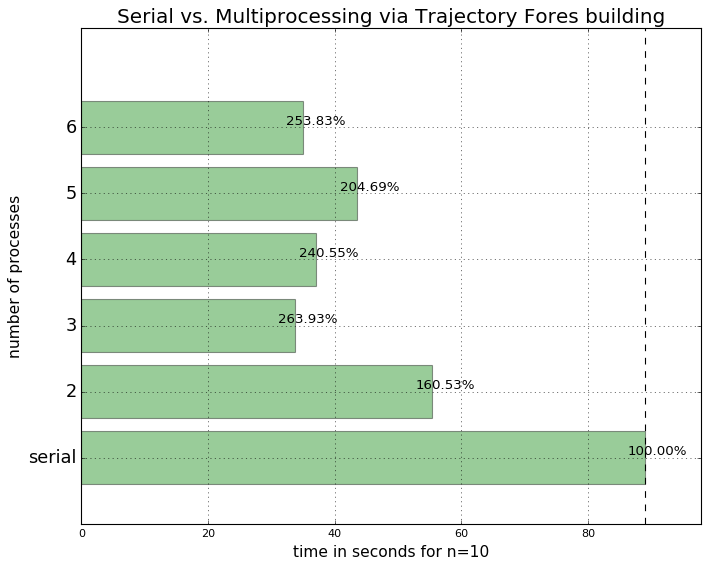

('\nPython version  :', '2.7.13')
('compiler        :', 'GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)')
('\nsystem     :', 'Darwin')
('release    :', '16.7.0')
('machine    :', 'x86_64')
('processor  :', 'i386')
('CPU count  :', 4)
('interpreter:', '64bit')





In [23]:
plot_results()
print_sysinfo()